In [1]:
import pandas as pd
import numpy as np
import json

# Développez un chatbot pour réserver des vacances

## Analyse exploratoire de données

In [2]:
with open("../Documents/Openclassrooms/P10/frames/frames.json") as f:
    dialogues = json.load(f)

In [3]:
dialogues[4].get("turns")[0]

{'text': 'Hello, I am looking to book a trip for 2 adults and 6 children for $21,300 or less. We are departing from Kochi for Denver.',
 'labels': {'acts': [{'args': [{'val': 'book', 'key': 'intent'}],
    'name': 'inform'},
   {'args': [{'val': '6', 'key': 'n_children'},
     {'val': '2', 'key': 'n_adults'},
     {'val': '$21,300', 'key': 'budget'},
     {'val': 'Kochi', 'key': 'or_city'},
     {'val': 'Denver', 'key': 'dst_city'}],
    'name': 'inform'},
   {'args': [], 'name': 'greeting'}],
  'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
    'name': 'inform'},
   {'args': [{'val': '6', 'key': 'n_children'},
     {'val': '2', 'key': 'n_adults'},
     {'val': '$21,300', 'key': 'budget'},
     {'val': 'Kochi', 'key': 'or_city'},
     {'val': 'Denver', 'key': 'dst_city'}],
    'name': 'inform'},
   {'args': [], 'name': 'greeting'}],
  'active_frame': 1,
  'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
     'budget': [{'val': '21.3', 'negated': F

In [4]:
data = pd.DataFrame(dialogues)
data.head()

,user_id,turns,wizard_id,id,labels
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc..."
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'userSurveyRating': 2.0, 'wizardSurveyTaskSuc..."
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."


In [5]:
data.columns

Index(['user_id', 'turns', 'wizard_id', 'id', 'labels'], dtype='object')

In [6]:
data['labels'].values

array([{'userSurveyRating': 4.0, 'wizardSurveyTaskSuccessful': True},
       {'userSurveyRating': 3.0, 'wizardSurveyTaskSuccessful': True},
       {'userSurveyRating': 2.0, 'wizardSurveyTaskSuccessful': False},
       ..., {'userSurveyRating': 5.0, 'wizardSurveyTaskSuccessful': True},
       {'userSurveyRating': 4.0, 'wizardSurveyTaskSuccessful': True},
       {'userSurveyRating': 5.0, 'wizardSurveyTaskSuccessful': True}],
      dtype=object)

Pour l’entrainement nous allons garder uniquement les dialogues validés par le client

In [7]:
data_final = data[data['labels']== {'userSurveyRating': 5.0, 'wizardSurveyTaskSuccessful': True}]

In [8]:
data_final.shape

(929, 5)

In [9]:
df_examples = data_final[['turns']].reset_index(drop=True)

In [10]:
df_examples.head()

,turns
0,[{'text': 'Hi I'd like to go to Caprica from B...
1,"[{'text': 'Hello, I am looking to book a trip ..."
2,"[{'text': 'Good day, please book me a trip fro..."
3,[{'text': 'Hi im looking for a nice destinatio...
4,"[{'text': 'Hi, I have a big family and we can'..."


In [11]:
#df_examples['turns'][:][0]

In [12]:
result=[]
for row in df_examples['turns']:
    new_row = {}
    new_row.update({'text':row[0].get('text')})
    for elem in row[0].get('labels').get('acts'):
        for item in elem.get('args'):
            new_row.update({item.get('key'):item.get('val')})
    result.append(new_row)
    
df_result= pd.DataFrame.from_records(result)

In [13]:
print(df_result.shape)
df_result.head()

(929, 21)


,text,intent,dst_city,or_city,str_date,end_date,n_children,n_adults,budget,max_duration,...,flex,name,beach,seat,category,min_duration,price,park,count_dst_city,university
0,"Hi I'd like to go to Caprica from Busan, betwe...",book,Caprica,Busan,"Sunday August 21, 2016","Wednesday August 31, 2016",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Hello, I am looking to book a trip for 2 adult...",book,Denver,Kochi,NaN,NaN,6,2,"$21,300",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Good day, please book me a trip from Vancouver...",book,Recife,"Vancouver, Jamaica",August 24,NaN,NaN,NaN,NaN,17 days,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hi im looking for a nice destination that i co...,book,NaN,Columbus,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Hi, I have a big family and we can't afford a ...",book,Atlantis,Mos Eisley,NaN,NaN,NaN,NaN,$3600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
df_result_final = df_result[['text','intent','dst_city','or_city','str_date','end_date','budget']]
df_result_final=df_result_final[(df_result_final['intent'].notna())& (df_result_final['intent']=='book')]
df_result_final.shape

(778, 7)

In [15]:
# <createUtterance>
def create_utterance(intent, utterance, labels):
    """Add an example LUIS utterance from utterance text and a list of
       labels.  Each label is a 2-tuple containing a label name and the
       text within the utterance that represents that label.

       Utterances apply to a specific intent, which must be specified."""

    text = utterance.lower()
    def label(name, value):
        value = value.lower()
        start = text.index(value)
        return dict(entity_name=name, start_char_index=start,
                    end_char_index=start + len(value))

    return dict(text=text, intent_name=intent, entity_labels=[label(n, v) for (n, v) in labels])
# </createUtterance>

In [16]:
df_result_final.describe(include ='all')

,text,intent,dst_city,or_city,str_date,end_date,budget
count,778,778,540,497,224,132,151
unique,777,1,191,199,141,105,94
top,I want to go to Dublin,book,-1,Beijing,August 27th,27th,-1
freq,2,778,17,11,9,4,11


In [17]:
df_result_final.isna().sum()

text          0
intent        0
dst_city    238
or_city     281
str_date    554
end_date    646
budget      627
dtype: int64

<AxesSubplot:>

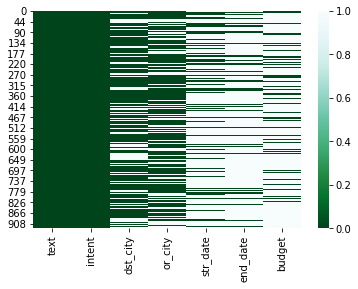

In [18]:
import seaborn as sns
sns.heatmap(df_result_final.isnull(),cmap="BuGn_r")

## Préparation des données

In [19]:
df_result_final = df_result_final.fillna('')
df_result_final = df_result_final.apply(lambda x: x.str.replace('-1', ''))
df_result_final = df_result_final.apply(lambda x: x.str.replace('.', ''))
df_result_final = df_result_final.apply(lambda x: x.str.strip())
df_result_final.head()

<ipython-input-19-7abd1a9410ca>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_result_final = df_result_final.apply(lambda x: x.str.replace('.', ''))


,text,intent,dst_city,or_city,str_date,end_date,budget
0,"Hi I'd like to go to Caprica from Busan, betwe...",book,Caprica,Busan,"Sunday August 21, 2016","Wednesday August 31, 2016",
1,"Hello, I am looking to book a trip for 2 adult...",book,Denver,Kochi,,,"$21,300"
2,"Good day, please book me a trip from Vancouver...",book,Recife,"Vancouver, Jamaica",August 24,,
3,Hi im looking for a nice destination that i co...,book,,Columbus,,,
4,"Hi, I have a big family and we can't afford a ...",book,Atlantis,Mos Eisley,,,$3600


In [20]:
result_final=[]
for idx, row in df_result_final.iterrows():
    text =row['text']
    if len(text)>5:
        params = []
        if len(row['or_city'])>2:
            params.append(('From',row['or_city']))
        if len(row['dst_city'])>2:
            params.append(('To',row['dst_city']))
        if len(row['str_date'])>3:
            params.append(('on_date',row['str_date']))
        if len(row['end_date'])>3:
            params.append(('end_date',row['end_date']))
        if len(row['budget'])>0:
            params.append(('budget',row['budget']))
        utterance=create_utterance('BookFlight',row['text'],params)
    #if len(params)>0:
    result_final.append(utterance)
print(result_final[1])   

{'text': 'hello, i am looking to book a trip for 2 adults and 6 children for $21,300 or less we are departing from kochi for denver', 'intent_name': 'BookFlight', 'entity_labels': [{'entity_name': 'From', 'start_char_index': 105, 'end_char_index': 110}, {'entity_name': 'To', 'start_char_index': 115, 'end_char_index': 121}, {'entity_name': 'budget', 'start_char_index': 67, 'end_char_index': 74}]}


Séparation des données en test set et train set

In [21]:
test_set = result_final[:200]
print(len(test_set))
train_set = result_final[201:]
print(len(train_set))


200
577


In [22]:
test_set[1]

{'text': 'hello, i am looking to book a trip for 2 adults and 6 children for $21,300 or less we are departing from kochi for denver',
 'intent_name': 'BookFlight',
 'entity_labels': [{'entity_name': 'From',
   'start_char_index': 105,
   'end_char_index': 110},
  {'entity_name': 'To', 'start_char_index': 115, 'end_char_index': 121},
  {'entity_name': 'budget', 'start_char_index': 67, 'end_char_index': 74}]}

In [23]:
for elem in test_set:
    elem['entities'] = elem.pop('entity_labels')
    elem['intent'] = elem.pop('intent_name')
    for item in elem.get('entities'):
        item['entity'] = item.pop('entity_name')
        item['startPos'] = item.pop('start_char_index')
        item['endPos'] = item.pop('end_char_index')
     

In [24]:
test_set[0]  

{'text': "hi i'd like to go to caprica from busan, between sunday august 21, 2016 and wednesday august 31, 2016",
 'entities': [{'entity': 'From', 'startPos': 34, 'endPos': 39},
  {'entity': 'To', 'startPos': 21, 'endPos': 28},
  {'entity': 'on_date', 'startPos': 49, 'endPos': 71},
  {'entity': 'end_date', 'startPos': 76, 'endPos': 101}],
 'intent': 'BookFlight'}

[
    {
        "text": "hey dad, are you hungry?",
        "intent": "None",
        "entities": [
            {
                "entity": "FamilyMember",
                "startPos": 4,
                "endPos": 6
            }
        ]
    }
]

Sauvegarde des fichiers

In [25]:
with open("booking_test_set.json", "w") as file:
    json.dump(test_set, file)
    
with open("booking_train_set.json", "w") as file:
    json.dump(train_set, file)
    
with open("exemple.json", "w") as file:
    json.dump(result_final[1], file)

Les fichiers suivants ont été créés :

 - booking_train_set.json en format nécessaire pour entrainer LUIS
 - booking_test_set.json en format nécessaire pour tester LUIS
 - exemple.json contient un exemple pour test manuel
